In [112]:
import pandas as pd
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)
from konlpy.tag import Okt # 옛날 Twitter 클래스
from konlpy.tag import Kkma
import re
import time 
from tqdm.notebook import tqdm
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [173]:
import pandas as pd
import numpy as np


df = pd.read_csv("result_sf.csv")
df_ = df.loc[:,['movie_id','reviews']]
df_words = df_['reviews'].sum()

original_list = df['movie_id'].tolist()
movie_id = list(set(original_list))

df_stop_word = pd.read_csv("stopwords_1.txt")  
stopwords = df_stop_word.iloc[:,0].unique()

list1 = df_stop_word.values.tolist()
stop_word_list = np.concatenate(list1).tolist() + ['입니다', '은', '는', '이', '가', '이거', '저거', '그거', '여기', '이쪽', '영화'] + movie_id

def okt_tokenizer(text, return_nouns_only=True):
    """
    input: korean text
    output: tokens

    if return_nouns_only option is True, only nouns will be extracted.
    """
    okt = Okt()

    if return_nouns_only:
        tokens = okt.nouns(text)
    else:
        tokens = okt.morphs(text)

    stopword = stop_word_list + ['입니다', '은', '는', '이', '가', '이거', '저거', '그거', '여기', '이쪽', '영화'] + movie_id
    tokens = [n for n in tokens if n not in stopword]
    return tokens


In [174]:
### 2글자 이상 단어중 명사, 형용사, 동사를 골라 스탑워즈 제외
df['word'] = 0
okt = Okt()

for i in tqdm(range(0, len(df))):
    df_words = df_['reviews'][i]
    sampledf = pd.DataFrame(okt.pos(df_words, norm=True, stem=True))
    ### 명사, 형용사, 동사만 추출
    try:
        sampledf = sampledf[(sampledf[1]=='Noun')|(sampledf[1]=='Adjective')|(sampledf[1]=='Verb')]
        ### 2글자 이상인 단어만 가져와서 리스트 만들기
        spword = []
        for word in sampledf[0]:
            if len(word)>=2:
                if word not in (stop_word_list): # 스탑워즈 제외하고 출력하기
                    spword.append(word)
        ### 영화별로 정제된 단어들을 리스트화해서 영화리뷰 테이블의 word컬럼에 담기
        a = pd.DataFrame(spword)[0].unique()
        df['word'][i] = a
    except KeyError:
        df['word'][i] = ""

df['word'] = df['word'].apply(lambda x: ', '.join(map(str, x)))
df['word'] = df['word'].str.replace(',', '')

  0%|          | 0/7360 [00:00<?, ?it/s]

C:\Users\KWJ\AppData\Local\Temp\ipykernel_12420\1727618687.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word'][i] = a


In [175]:
from sklearn.feature_extraction.text import TfidfVectorizer
from konlpy.tag import Okt
okt = Okt()

re = df['word']



vectorizer = TfidfVectorizer(tokenizer=okt_tokenizer, max_features=500, ngram_range=(1,4))
X = vectorizer.fit_transform(re) 
df_bow_korean = pd.DataFrame(X.todense(), columns=vectorizer.get_feature_names_out())
df_bow_korean

C:\Users\KWJ\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,가능성,가면,가족,가짜,가치,갈등,감각,감동,감성,감정,강조,개그,개념,개성,개연,개인,거부,거장,거지,걱정,게임,결과,결말,결정,경계,경이,경험,계획,고뇌,고려,고민,고찰,고통,공간,공감,공부,공존,공포,과거,과학,관계,광기,괴물,교훈,구원,구축,구현,국가,권력,그래픽,...,포기,포스터,폭력,폭발,표정,풀다,풍경,풍자,플레이,하늘,하루,한계,한국,한스,한스 짐머,할리우드,해결,해석,행복,행성,헐리우드,헝거게임,혁명,현대,현실,현재,형성,호러,호흡,혼란,홀로,화성,확신,확인,확장,환경,환상,활용,회수,후속,후속작,후회,휴머니즘,흥미,흥미진진,흥행,희망,희망이,희생,히어로
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7355,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7356,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7357,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.483561,0.436018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [176]:
X = df_bow_korean
y = df['sentiment']

In [177]:
## data split package
from sklearn.model_selection import train_test_split
## model training package
from sklearn.linear_model import LogisticRegression
## model evaluation package
from sklearn.metrics import accuracy_score, f1_score

# data split ## train:test = 7:3
X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
#X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

# model training: Lasso (l1 penalty)
clf = LogisticRegression(penalty='l1', solver='saga', C=10, random_state=42)
clf.fit(X_trn, y_trn)

# model evaluation
y_trn_pred = clf.predict(X_trn)
acc = accuracy_score(y_trn, y_trn_pred)
f1 = f1_score(y_trn, y_trn_pred)
print('Training Accuracy: {:.4f}, F1: {:.4f}'.format(acc, f1))
y_tst_pred = clf.predict(X_tst)
acc = accuracy_score(y_tst, y_tst_pred)
f1 = f1_score(y_tst, y_tst_pred)
print('Test Accuracy    : {:.4f}, F1: {:.4f}'.format(acc, f1))

Training Accuracy: 0.8511, F1: 0.9176
Test Accuracy    : 0.8374, F1: 0.9098


C:\Users\KWJ\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [178]:
import numpy as np

coefficient_values = clf.coef_.squeeze()
feature_names = X.columns

args = np.argsort(coefficient_values)

In [179]:
print('positive words:')
for token, coef in zip(feature_names[args[-100:][::-1]], coefficient_values[args[-100:]][::-1]): # [::-1] for reversing the order
    print('{:>20}: {:.4f}'.format(token, coef))

positive words:
                  압도: 6.3925
                 생명체: 4.9073
                  루프: 4.8985
                  전율: 4.8353
                  자연: 4.8103
                  심리: 4.7550
                  동화: 4.7196
                  신경: 4.5031
                  혼란: 4.4081
                  색감: 4.3757
                  호러: 4.2585
                  극한: 4.2045
                  눈빛: 4.1596
                  소년: 4.0395
                  중력: 4.0350
                  후회: 3.9700
                  개인: 3.9427
                  전설: 3.7908
                복제인간: 3.7516
                  자유: 3.7002
                  장대: 3.6834
                  완성: 3.6151
                  여운: 3.4673
                  연결: 3.4003
                멀티버스: 3.3875
                  고찰: 3.3830
                  환상: 3.3128
                  고통: 3.2663
                  혁명: 3.2657
                  투쟁: 3.2655
                  실존: 3.2529
                  화성: 3.0822
                  가치: 3.0612
                  정의: 3.058

In [183]:
print('negative words:')
for token, coef in zip(feature_names[args[:11]], coefficient_values[args[:11]]):
    print('{:<20}: {:.4f}'.format(token, coef))

negative words:
전우치                 : -10.2211
웃음                  : -4.1961
권력                  : -3.9806
정체                  : -3.9364
공감                  : -2.9735
스포일러                : -2.9066
디테일                 : -2.8873
뿌리                  : -2.7204
위기                  : -2.7184
쓰레기                 : -2.6711
복제                  : -2.6537


In [181]:
pos_word = list(feature_names[args[-100:][::-1]])
coef_values = list((coefficient_values[args[-100:]][::-1])*10)
rounded_values = [int(number) for number in coef_values]
word_dict = dict(zip(pos_word, rounded_values))

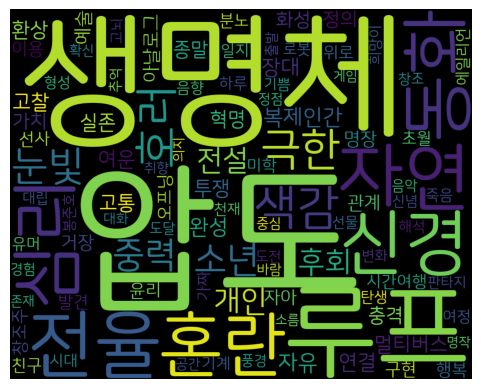

In [182]:
wc = WordCloud(font_path='NanumSquareRoundR.ttf', width=1000, height=800, max_words=1000).generate_from_frequencies(word_dict)
plt.imshow(wc)
plt.axis("off")
plt.show()
